In [1]:
from pathlib import Path
import numpy as np
import logging

import pyvista as pv
pv.set_jupyter_backend("pythreejs")

from project_heart.enums import *
from project_heart.lv import LV

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")
# filepath = Path("C:/Users/igornobrega/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

# Load File and Create Speckles

In [3]:
lv = LV.from_file(filepath, log_level=logging.DEBUG)
lv.identify_regions(LV_GEO_TYPES.IDEAL,
    apex_base_args={"ab_ql":0.03, "ab_qh":0.90},
    endo_epi_args={"threshold":85,})
lv.plot("mesh", 
        scalars=LV_MESH_DATA.SURFS,
        container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

## Create Longitudinal Speckles

In [4]:
for i, a in enumerate(np.linspace(0, np.pi, 6, endpoint=False)):
    
    spk = lv.create_speckles(
        collection="long-6",
        group="endo",
        name=str(i),
        from_nodeset=LV_SURFS.ENDO,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=1.75,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="long-6",
        group="epi",
        name=str(i),
        from_nodeset=LV_SURFS.EPI,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=2.4,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("long-6", spk_collection="long-6")
lv.plot(
    scalars="long-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )



INFO:create_speckles:Speckle: name: 0, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 0, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: epi, collection: long-6


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

## Create circumferential speckles

In [5]:
names = ["subapex", "apex", "superapex", "submid", "mid", "supermid", "subbase", "base", "superbase"]

for i, a in enumerate(np.linspace(0.1, 1.0, len(names), endpoint=False)):
    
    spk = lv.create_speckles(
        collection="circ-6",
        group="endo",
        name=names[i],
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="circ-6",
        group="epi",
        name=names[i],
        from_nodeset=LV_SURFS.EPI,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("circ-6", spk_collection="circ-6")
lv.plot(
    scalars="circ-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Speckle: name: subapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: subapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: subbase, group: endo, collection: circ-6
INFO:create_spe

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Compute Metric

Using some subset for numerical validation

Using 'base' subset as reference, we expect a radius of 30 and ~24.5 at first and last timesteps, respectively. 

Expected values for timesteps [0, 0.1 and 1.1]:

- Radius Endo (approx):    25,  17,  17.5
- Radius Epi (approx):     35,  32,  32
- Thickness:               10,  15,  14.5

In [6]:
endo_circ_spks = lv.get_speckles(spk_name="base", spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_name="base", spk_group="epi", spk_collection="circ-6")

lv.thickness(endo_circ_spks, epi_circ_spks, log_level=logging.DEBUG)

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.WALL_THICKNESS'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIUS'
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIUS'
DEBUG:LV.BaseMetricsComputations:Computing speckle thickness for spks: '<Speckle: .subset: 0, .name: base, .group: endo, .collection: circ-6, .t: 0.0>' and '<Speckle: .subset: 0, .name: base, .group: epi, .collection: circ-6, .t: 0.0>
DEBUG:LV.BaseMetricsComputations:-r_endo:
'[24.99792491 22.24972763 20.10502927 18.34125998 16.87419833 16.89101651
 16.90754318 16.9232533  16.93997354 16.95587717 16.9726171  16.98858249
 17.00524927 17.02120408 17.03774939 17.05365453 17.07005511 17.08588984
 17.1021311  17.11788135 17.13395859 17.1496204  17.16553872 17.18111516
 17.18783526 17.20332529 17.21893883 17.2343501  17.24982041 17.26515474
 17.28048616 17.28600346 17.30119812 17.31637215 17.33143046 17.34652607
 17.36145514 17.3764714  17.39126923 17.40620325 17.42087407 17.4357282


array([ 9.98628766, 11.14642863, 12.58128064, 13.66101662, 14.84790144,
       14.84160809, 14.83378401, 14.82414451, 14.81658786, 14.80713794,
       14.79973769, 14.79039282, 14.78308281, 14.77379261, 14.76653269,
       14.75726651, 14.75003165, 14.74077048, 14.73354451, 14.72427597,
       14.7170479 , 14.70776341, 14.70052479, 14.69121773, 14.68399445,
       14.67465949, 14.66738093, 14.65801407, 14.65070826, 14.64130616,
       14.63396936, 14.62455952, 14.61718791, 14.60770762, 14.60029893,
       14.59077721, 14.58332904, 14.5737649 , 14.56627551, 14.55666869,
       14.54913718, 14.53948821, 14.53191394, 14.52222367, 14.51460682])

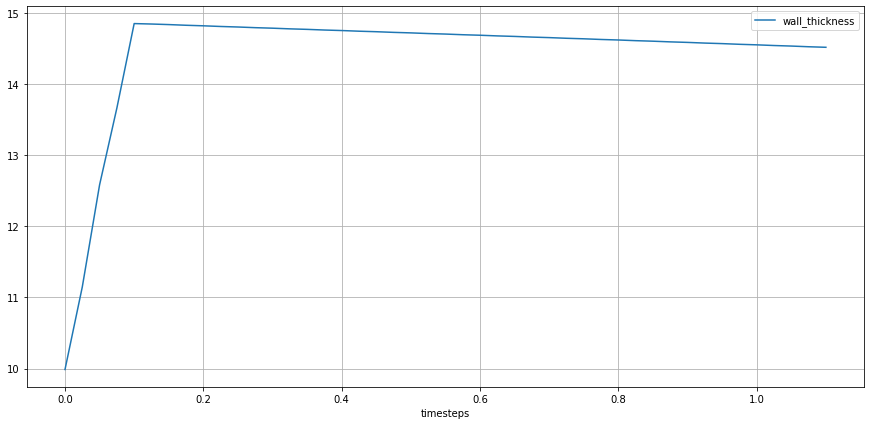

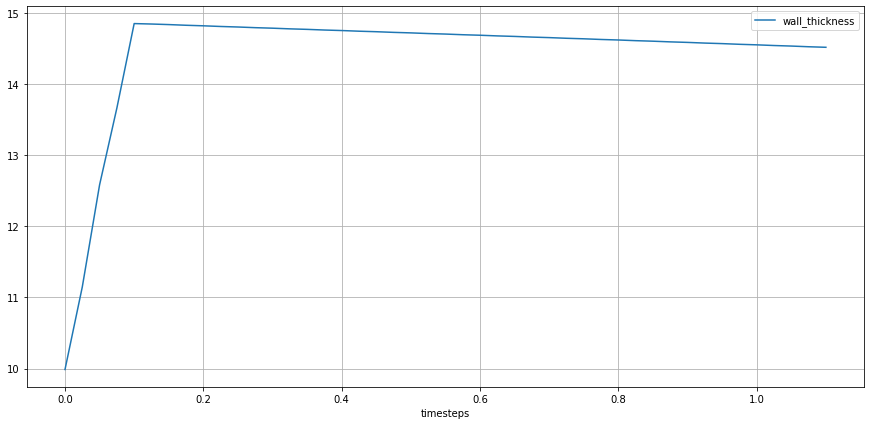

In [7]:
lv.plot_metric(lv.STATES.THICKNESS, from_ts=0.0, plot_infos={'group'})

Using all avaiable speckles

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.WALL_THICKNESS'


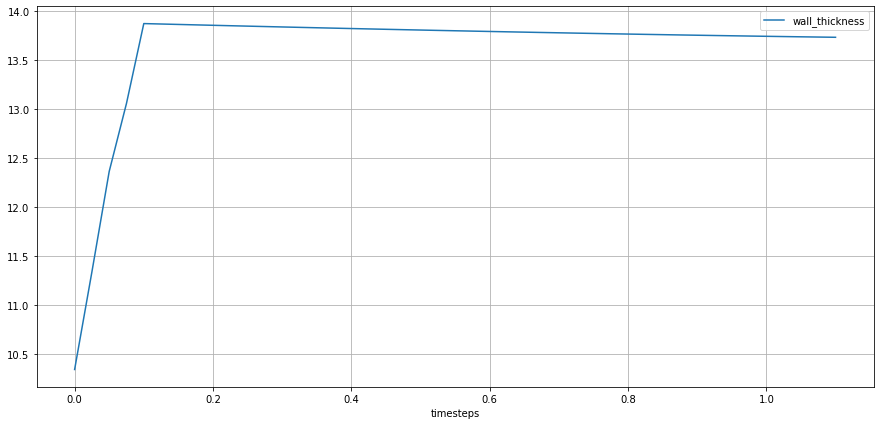

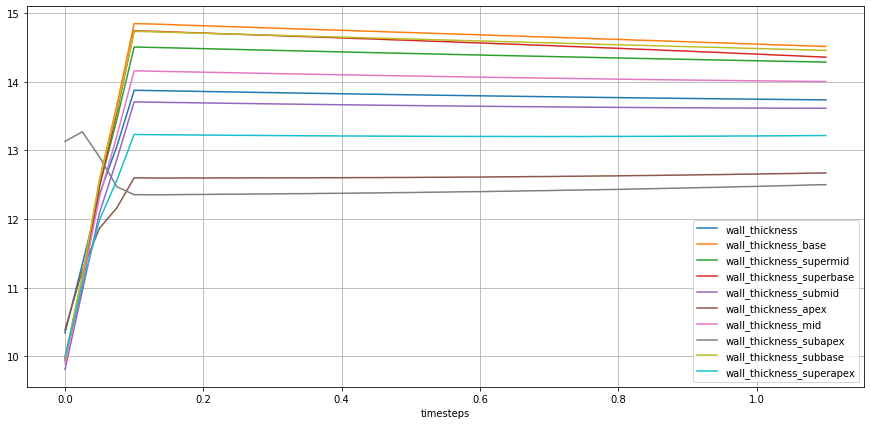

In [9]:
endo_circ_spks = lv.get_speckles(spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_group="epi", spk_collection="circ-6")

lv.thickness(endo_circ_spks, epi_circ_spks, recompute=True, log_level=logging.INFO)
lv.plot_metric(lv.STATES.THICKNESS, from_ts=0.0, plot_infos={'name'})